# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
from PIL import Image
import io

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Code

In [3]:
image = cv2.imread("/Users/samanthabritoozuna/Desktop/Opti_reto/Fotos/Color.jpg")

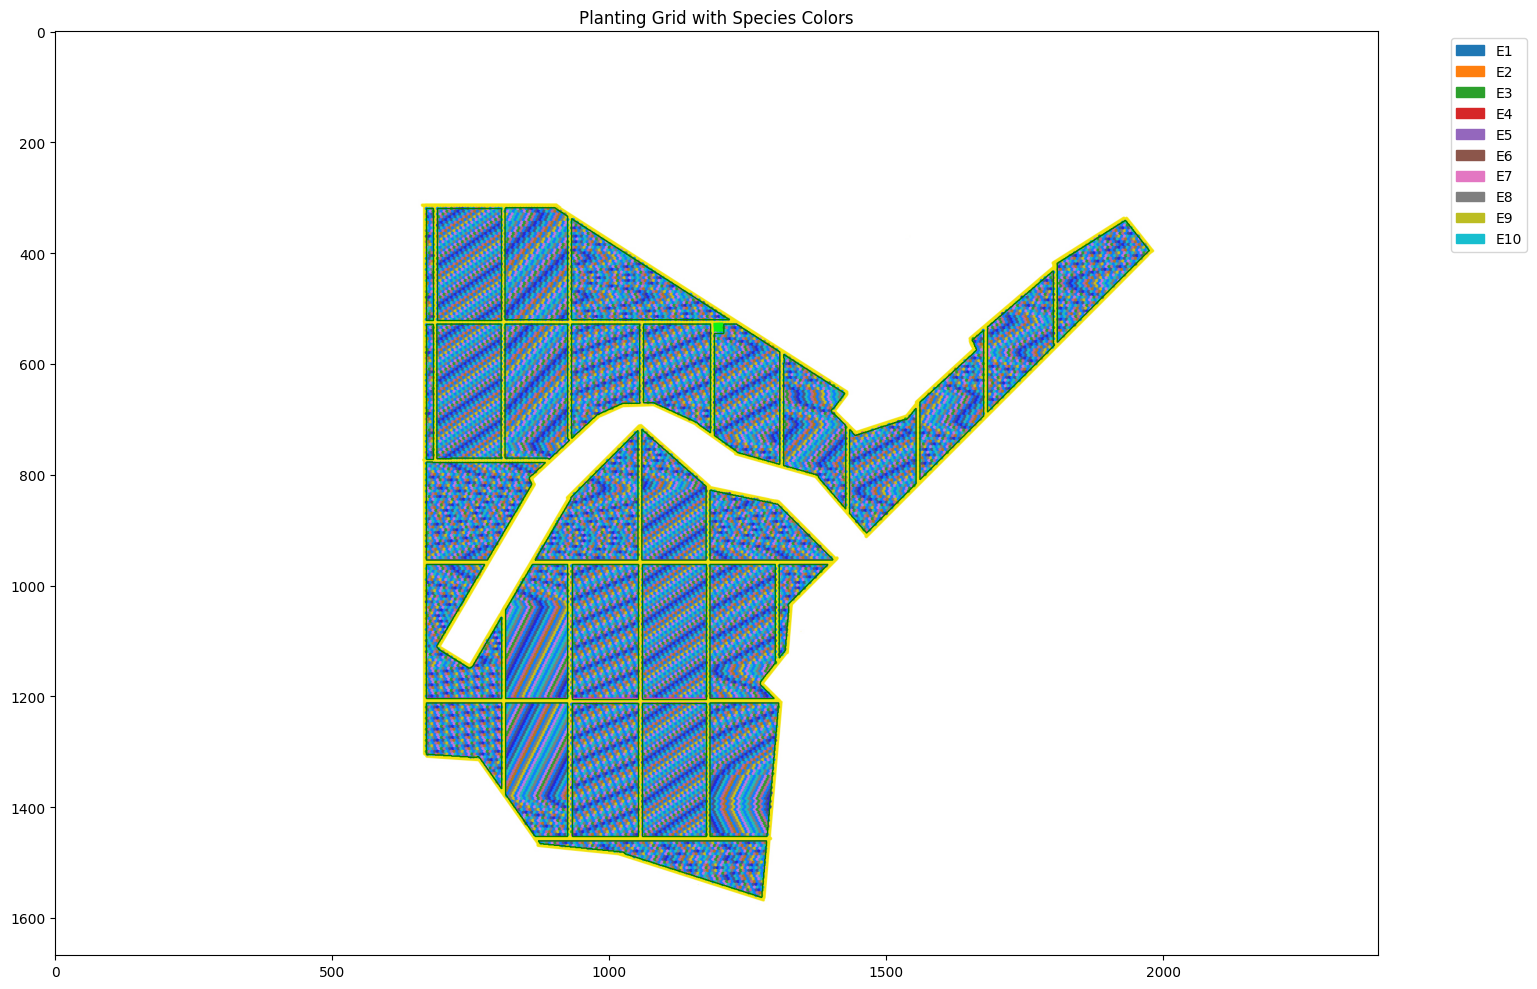


Plant counts per polygon:

Polygon 1:
  E1: 32 plants
  E2: 223 plants
  E3: 32 plants
  E4: 32 plants
  E5: 64 plants
  E6: 64 plants
  E7: 63 plants
  E8: 64 plants
  E9: 95 plants
  E10: 32 plants

Polygon 2:
  E1: 50 plants
  E2: 352 plants
  E3: 50 plants
  E4: 50 plants
  E5: 100 plants
  E6: 100 plants
  E7: 100 plants
  E8: 101 plants
  E9: 151 plants
  E10: 50 plants

Polygon 3:
  E1: 51 plants
  E2: 359 plants
  E3: 52 plants
  E4: 51 plants
  E5: 102 plants
  E6: 102 plants
  E7: 103 plants
  E8: 103 plants
  E9: 154 plants
  E10: 51 plants

Polygon 4:
  E1: 53 plants
  E2: 374 plants
  E3: 54 plants
  E4: 54 plants
  E5: 107 plants
  E6: 107 plants
  E7: 107 plants
  E8: 107 plants
  E9: 160 plants
  E10: 53 plants

Polygon 5:
  E1: 45 plants
  E2: 319 plants
  E3: 46 plants
  E4: 46 plants
  E5: 91 plants
  E6: 92 plants
  E7: 91 plants
  E8: 91 plants
  E9: 137 plants
  E10: 45 plants

Polygon 6:
  E1: 26 plants
  E2: 184 plants
  E3: 26 plants
  E4: 26 plants
  E5: 52 p

In [4]:
# Load and process image (your existing code)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_magenta = np.array([140, 50, 50])
upper_magenta = np.array([170, 255, 255])
mask_magenta = cv2.inRange(hsv, lower_magenta, upper_magenta)
contours, _ = cv2.findContours(mask_magenta, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Scale and spacing (your existing code)
scale_factor = 100 / 0.6  # pixels per meter
espaciado_plantas_cm = 3.5  # cm
espaciado_plantas = espaciado_plantas_cm / 100  # in meters
spacing_px = int(espaciado_plantas * scale_factor)

# Planting sequence (22 positions)
planting_sequence = [
    'E2', 'E9', 'E8', 'E2', 'E7', 'E3', 'E5', 'E2', 'E6', 'E4',
    'E2', 'E6', 'E9', 'E2', 'E5', 'E1', 'E2', 'E8', 'E10', 'E2', 'E7', 'E9'
]

# Plant type colors (extended palette)
plant_colors = {
    'E1': (0.121, 0.466, 0.705),  # Blue
    'E2': (1.0, 0.498, 0.055),     # Orange
    'E3': (0.172, 0.627, 0.172),   # Green
    'E4': (0.839, 0.152, 0.156),    # Red
    'E5': (0.580, 0.404, 0.741),   # Purple
    'E6': (0.549, 0.337, 0.294),   # Brown
    'E7': (0.890, 0.466, 0.760),   # Pink
    'E8': (0.498, 0.498, 0.498),    # Gray
    'E9': (0.737, 0.741, 0.133),    # Yellow
    'E10': (0.090, 0.745, 0.811)    # Cyan
}

def apply_planting_sequence(image, contours, sequence, colors, spacing_px):
    """Apply planting sequence colors to existing grid"""
    # Create output image
    output = image.copy()
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Show original image
    ax.imshow(output_rgb)
    
    # Process each polygon
    plant_counts = []
    
    for i, cnt in enumerate(contours):
        # Create mask for current polygon
        mask_poly = np.zeros_like(mask_magenta)
        cv2.drawContours(mask_poly, [cnt], 0, 255, -1)
        
        # Get all plant positions (from your existing grid)
        height, width = mask_poly.shape
        plant_positions = []
        
        # Hexagonal grid pattern (your 3 bolillos implementation)
        for y in range(0, height, spacing_px):
            offset = (spacing_px // 2) if (y // spacing_px) % 2 == 1 else 0
            for x in range(0 + offset, width, spacing_px):
                if mask_poly[y, x] == 255:
                    plant_positions.append((x, y))
        
        # Apply planting sequence colors
        sequence_length = len(sequence)
        poly_counts = {code: 0 for code in colors.keys()}
        
        for idx, (x, y) in enumerate(plant_positions):
            # Cycle through the planting sequence
            plant_code = sequence[idx % sequence_length]
            
            # Draw colored circle
            color_rgb = [int(c * 255) for c in colors[plant_code]]
            cv2.circle(output, (x, y), 3, color_rgb, -1)
            
            # Count plants
            poly_counts[plant_code] += 1
        
        plant_counts.append(poly_counts)
        
        # Draw polygon outline
        poly_patch = mpatches.Polygon(
            cnt.squeeze(), 
            fill=False, 
            edgecolor='green', 
            linewidth=1
        )
        ax.add_patch(poly_patch)
    
    # Convert back to RGB for display
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    ax.imshow(output_rgb)
    
    # Create legend
    legend_patches = []
    for code, color in colors.items():
        legend_patches.append(mpatches.Patch(color=color, label=f"{code}"))
    
    ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_title("Planting Grid with Species Colors")
    plt.tight_layout()
    
    return fig, output, plant_counts

# Apply planting sequence to grid
fig, result_img, plant_counts = apply_planting_sequence(
    image, contours, planting_sequence, plant_colors, spacing_px
)

# Save results
cv2.imwrite("planting_grid_colored.jpg", result_img)
plt.savefig("planting_visualization.jpg", bbox_inches='tight', dpi=300)
plt.show()

# Print plant counts
print("\nPlant counts per polygon:")
for i, counts in enumerate(plant_counts):
    print(f"\nPolygon {i+1}:")
    for code, count in counts.items():
        if count > 0:
            print(f"  {code}: {count} plants")

In [6]:
# Polygon identification and labeling
polygon_data = []
for i, cnt in enumerate(contours):
    # Calculate polygon area
    area = cv2.contourArea(cnt)
    # Get bounding rectangle
    x, y, w, h = cv2.boundingRect(cnt)
    # Store polygon characteristics
    polygon_data.append({
        'id': i+1,
        'area_px': area,
        'bounding_box': (x, y, w, h),
        'centroid': tuple(np.mean(cnt.squeeze(), axis=0).astype(int))
    })

# Print polygon information
print("=== Polygon Identification ===")
for poly in polygon_data:
    print(f"Polygon {poly['id']}:")
    print(f"  Area: {poly['area_px']:.0f} px")
    print(f"  Bounding box: (x={poly['bounding_box'][0]}, y={poly['bounding_box'][1]}, "
          f"w={poly['bounding_box'][2]}, h={poly['bounding_box'][3]})")
    print(f"  Centroid: {poly['centroid']}")
    print()

=== Polygon Identification ===
Polygon 1:
  Area: 17884 px
  Bounding box: (x=872, y=1461, w=413, h=103)
  Centroid: (1126, 1513)

Polygon 2:
  Area: 27368 px
  Bounding box: (x=1182, y=1212, w=125, h=242)
  Centroid: (1290, 1333)

Polygon 3:
  Area: 27956 px
  Bounding box: (x=1059, y=1212, w=117, h=242)
  Centroid: (1117, 1332)

Polygon 4:
  Area: 28920 px
  Bounding box: (x=932, y=1212, w=121, h=242)
  Centroid: (992, 1332)

Polygon 5:
  Area: 24962 px
  Bounding box: (x=813, y=1212, w=113, h=242)
  Centroid: (842, 1406)

Polygon 6:
  Area: 14256 px
  Bounding box: (x=670, y=1212, w=137, h=156)
  Centroid: (764, 1325)

Polygon 7:
  Area: 5003 px
  Bounding box: (x=1307, y=962, w=89, h=170)
  Centroid: (1320, 1079)

Polygon 8:
  Area: 27600 px
  Bounding box: (x=1182, y=962, w=120, h=243)
  Centroid: (1278, 1143)

Polygon 9:
  Area: 28072 px
  Bounding box: (x=1059, y=962, w=117, h=243)
  Centroid: (1117, 1083)

Polygon 10:
  Area: 29040 px
  Bounding box: (x=932, y=962, w=121, h=243

=== Polygon Identification ===
Polygon 1:
  Area: 17884 px
  Bounding box: (x=872, y=1461, w=413, h=103)
  Centroid: (1126, 1513)

Polygon 2:
  Area: 27368 px
  Bounding box: (x=1182, y=1212, w=125, h=242)
  Centroid: (1290, 1333)

Polygon 3:
  Area: 27956 px
  Bounding box: (x=1059, y=1212, w=117, h=242)
  Centroid: (1117, 1332)

Polygon 4:
  Area: 28920 px
  Bounding box: (x=932, y=1212, w=121, h=242)
  Centroid: (992, 1332)

Polygon 5:
  Area: 24962 px
  Bounding box: (x=813, y=1212, w=113, h=242)
  Centroid: (842, 1406)

Polygon 6:
  Area: 14256 px
  Bounding box: (x=670, y=1212, w=137, h=156)
  Centroid: (764, 1325)

Polygon 7:
  Area: 5003 px
  Bounding box: (x=1307, y=962, w=89, h=170)
  Centroid: (1320, 1079)

Polygon 8:
  Area: 27600 px
  Bounding box: (x=1182, y=962, w=120, h=243)
  Centroid: (1278, 1143)

Polygon 9:
  Area: 28072 px
  Bounding box: (x=1059, y=962, w=117, h=243)
  Centroid: (1117, 1083)

Polygon 10:
  Area: 29040 px
  Bounding box: (x=932, y=962, w=121, h=243

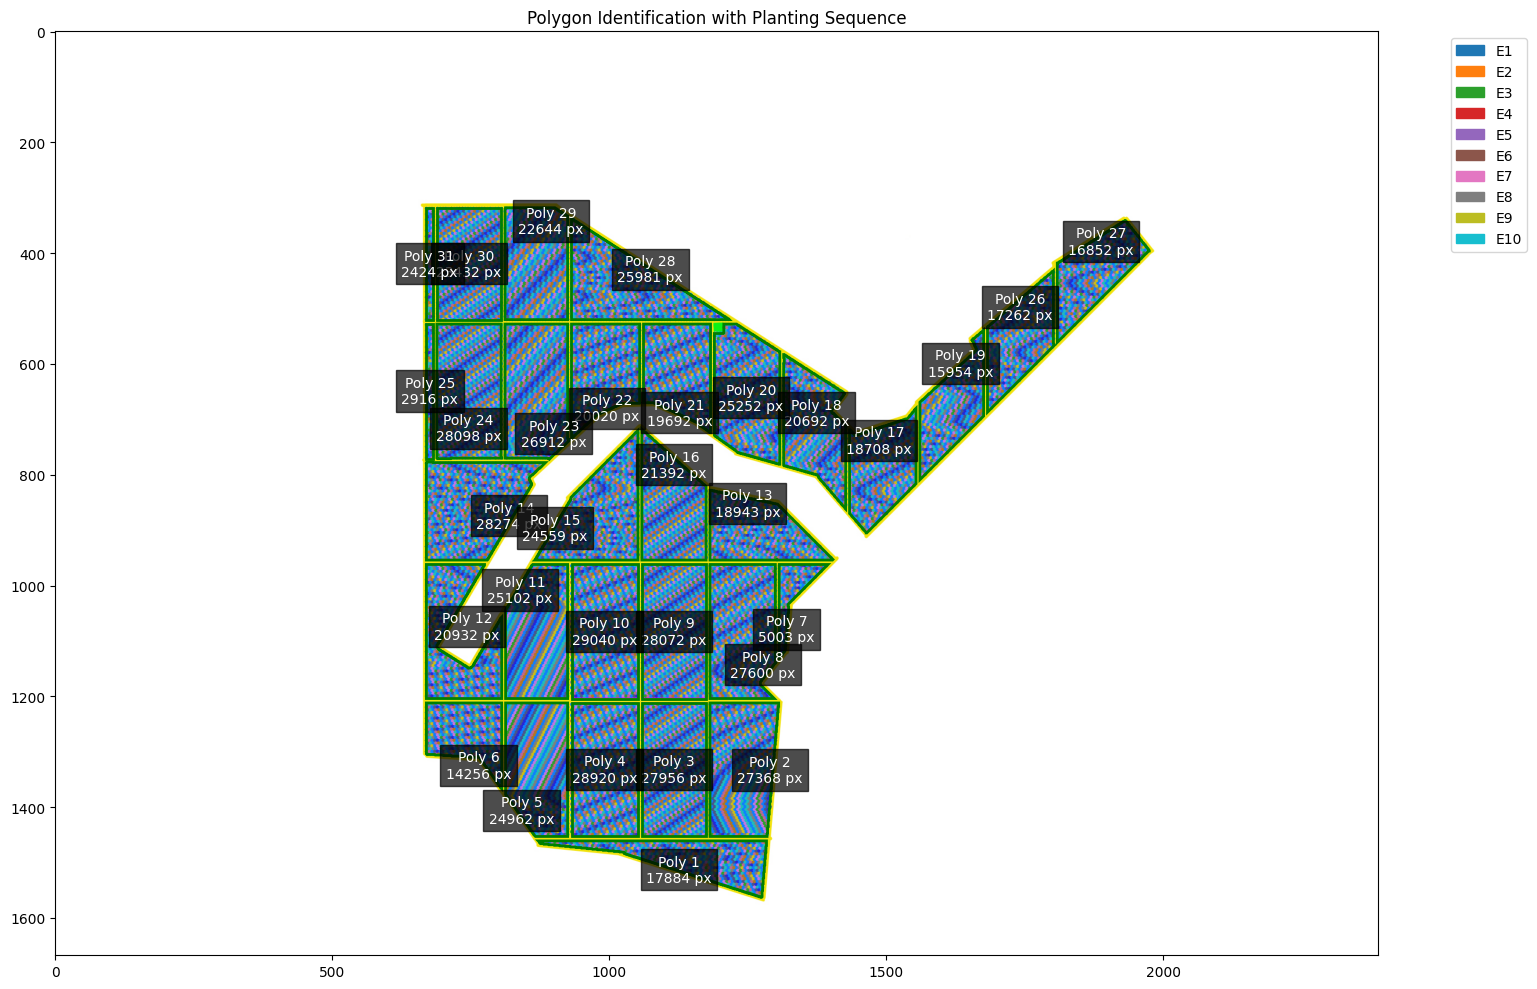


=== Detailed Plant Counts ===

Polygon 1:
  E1: 32 plants
  E2: 223 plants
  E3: 32 plants
  E4: 32 plants
  E5: 64 plants
  E6: 64 plants
  E7: 63 plants
  E8: 64 plants
  E9: 95 plants
  E10: 32 plants

Polygon 2:
  E1: 50 plants
  E2: 352 plants
  E3: 50 plants
  E4: 50 plants
  E5: 100 plants
  E6: 100 plants
  E7: 100 plants
  E8: 101 plants
  E9: 151 plants
  E10: 50 plants

Polygon 3:
  E1: 51 plants
  E2: 359 plants
  E3: 52 plants
  E4: 51 plants
  E5: 102 plants
  E6: 102 plants
  E7: 103 plants
  E8: 103 plants
  E9: 154 plants
  E10: 51 plants

Polygon 4:
  E1: 53 plants
  E2: 374 plants
  E3: 54 plants
  E4: 54 plants
  E5: 107 plants
  E6: 107 plants
  E7: 107 plants
  E8: 107 plants
  E9: 160 plants
  E10: 53 plants

Polygon 5:
  E1: 45 plants
  E2: 319 plants
  E3: 46 plants
  E4: 46 plants
  E5: 91 plants
  E6: 92 plants
  E7: 91 plants
  E8: 91 plants
  E9: 137 plants
  E10: 45 plants

Polygon 6:
  E1: 26 plants
  E2: 184 plants
  E3: 26 plants
  E4: 26 plants
  E5: 

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

# Load and process image
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_magenta = np.array([140, 50, 50])
upper_magenta = np.array([170, 255, 255])
mask_magenta = cv2.inRange(hsv, lower_magenta, upper_magenta)
contours, _ = cv2.findContours(mask_magenta, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Polygon identification and labeling
polygon_data = []
for i, cnt in enumerate(contours):
    # Calculate polygon area
    area = cv2.contourArea(cnt)
    # Get bounding rectangle
    x, y, w, h = cv2.boundingRect(cnt)
    # Store polygon characteristics
    polygon_data.append({
        'id': i+1,
        'area_px': area,
        'bounding_box': (x, y, w, h),
        'centroid': tuple(np.mean(cnt.squeeze(), axis=0).astype(int))
    })

# Print polygon information
print("=== Polygon Identification ===")
for poly in polygon_data:
    print(f"Polygon {poly['id']}:")
    print(f"  Area: {poly['area_px']:.0f} px")
    print(f"  Bounding box: (x={poly['bounding_box'][0]}, y={poly['bounding_box'][1]}, "
          f"w={poly['bounding_box'][2]}, h={poly['bounding_box'][3]})")
    print(f"  Centroid: {poly['centroid']}")
    print()

# Continue with planting visualization (your existing code)
scale_factor = 100 / 0.6
espaciado_plantas_cm = 3.5
espaciado_plantas = espaciado_plantas_cm / 100
spacing_px = int(espaciado_plantas * scale_factor)

planting_sequence = [
    'E2', 'E9', 'E8', 'E2', 'E7', 'E3', 'E5', 'E2', 'E6', 'E4',
    'E2', 'E6', 'E9', 'E2', 'E5', 'E1', 'E2', 'E8', 'E10', 'E2', 'E7', 'E9'
]

plant_colors = {
    'E1': (0.121, 0.466, 0.705), 'E2': (1.0, 0.498, 0.055),
    'E3': (0.172, 0.627, 0.172), 'E4': (0.839, 0.152, 0.156),
    'E5': (0.580, 0.404, 0.741), 'E6': (0.549, 0.337, 0.294),
    'E7': (0.890, 0.466, 0.760), 'E8': (0.498, 0.498, 0.498),
    'E9': (0.737, 0.741, 0.133), 'E10': (0.090, 0.745, 0.811)
}

def visualize_polygons_with_sequence(image, contours, polygon_data, sequence, colors, spacing_px):
    output = image.copy()
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Draw original image
    ax.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    
    # Draw each polygon with ID and characteristics
    for poly in polygon_data:
        cnt = contours[poly['id']-1]
        
        # Draw polygon outline
        poly_patch = mpatches.Polygon(
            cnt.squeeze(), 
            fill=False, 
            edgecolor='green', 
            linewidth=2
        )
        ax.add_patch(poly_patch)
        
        # Label polygon with ID and area
        label = f"Poly {poly['id']}\n{poly['area_px']:.0f} px"
        ax.text(poly['centroid'][0], poly['centroid'][1], label,
                color='white', ha='center', va='center',
                bbox=dict(facecolor='black', alpha=0.7))
    
    # Apply planting sequence to each polygon
    plant_counts = []
    for poly in polygon_data:
        cnt = contours[poly['id']-1]
        mask_poly = np.zeros_like(mask_magenta)
        cv2.drawContours(mask_poly, [cnt], 0, 255, -1)
        
        # Get plant positions in this polygon
        height, width = mask_poly.shape
        plant_positions = []
        
        for y in range(0, height, spacing_px):
            offset = (spacing_px // 2) if (y // spacing_px) % 2 == 1 else 0
            for x in range(0 + offset, width, spacing_px):
                if mask_poly[y, x] == 255:
                    plant_positions.append((x, y))
        
        # Apply planting sequence
        sequence_length = len(sequence)
        poly_counts = {code: 0 for code in colors.keys()}
        
        for idx, (x, y) in enumerate(plant_positions):
            plant_code = sequence[idx % sequence_length]
            color_rgb = [int(c * 255) for c in colors[plant_code]]
            cv2.circle(output, (x, y), 3, color_rgb, -1)
            poly_counts[plant_code] += 1
        
        plant_counts.append({'poly_id': poly['id'], 'counts': poly_counts})
    
    # Show final result
    ax.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    
    # Create legend
    legend_patches = []
    for code, color in colors.items():
        legend_patches.append(mpatches.Patch(color=color, label=code))
    ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.set_title("Polygon Identification with Planting Sequence")
    plt.tight_layout()
    return fig, output, plant_counts

# Generate visualization
fig, result_img, plant_counts = visualize_polygons_with_sequence(
    image, contours, polygon_data, planting_sequence, plant_colors, spacing_px
)

# Save results
cv2.imwrite("identified_polygons_with_plants.jpg", result_img)
plt.savefig("polygon_identification.jpg", bbox_inches='tight', dpi=300)
plt.show()

# Print detailed plant counts
print("\n=== Detailed Plant Counts ===")
for pc in plant_counts:
    print(f"\nPolygon {pc['poly_id']}:")
    for code, count in pc['counts'].items():
        if count > 0:
            print(f"  {code}: {count} plants")